# Collect data DONE
# Cleanup data DONE
# WordCloud DONE (fix draw first one also without stopwords)
# Sentiment (Vader) -> check rougness of lyrics per year/ check number of abcense words
# topic modelling
# Web wiki db -> plot map of relation between birth place and artists in top rank
# Train NN T5 ->< try to explain lyrics -> explain all text

# Setup

In [1]:
!pip install torch --quiet
!pip install sklearn --quiet
!pip install datasets --quiet
!apt install git-lfs --quiet
!pip install transformers --quiet
!pip install sentencepiece --quiet

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 KB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 40.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 12.2 MB/s eta 0:00:00
Reading package lists...
Building dependency tree...
Reading state information...
git-lfs is already the newest version (2.9.2-1).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
!pip install scikit-learn --quiet

In [3]:
!pip install nltk --quiet

In [4]:
!pip install -U pip setuptools wheel --quiet
!pip install -U spacy==2.3.9 --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 37.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 56.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.
cvxpy 1.3.0 requires setuptools<=64.0.2, but you have setuptools 67.6.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 34.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 43.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.2/209.2 kB 20.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-core-web-sm 3.5.0 requires spacy<3.6.0,>=3.5.0, but you have spacy 2.3.9 which is incompatible.


In [16]:
!python3 -m spacy download en

DEPRECATION: https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.3.1/en_core_web_sm-2.3.1.tar.gz#egg=en_core_web_sm==2.3.1 contains an egg fragment with a non-PEP 508 name pip 25.0 will enforce this behaviour change. A possible replacement is to use the req @ url syntax, and remove the egg fragment. Discussion can be found at https://github.com/pypa/pip/issues/11617
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 86.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for en_core_web_sm: filename=en_core_web_sm-2.3.1-py3-none-any.whl size=12047102 sha256=01388e9a8d129fcf6d9427f7a1f82c8ab4e9e99ddbc329e96d21fb79f4e6ca27
  Stored in directory: /root/.cache/pip/wheels/19/d6/1c/5484b95647df5d7afaf74abde458c66c1cd427e69e801fe826
Successfully built en_core_web_sm
  Attempting uninstall: en_core_web_sm
    Found existing installation: en-

In [8]:
!pip install gensim --quiet

In [19]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 33.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 29.8 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.2.0 which is incompatible.


In [5]:
!pip install pandas --quiet
!pip install numpy --quiet
!pip install matplotlib --quiet
!pip install wordcloud --quiet

In [6]:
!pip install beautifulsoup4 --quiet
!pip install lyricsgenius --quiet
!pip install billboard.py --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.4/59.4 kB 5.7 MB/s eta 0:00:00


In [ ]:
# !pip install git+https://github.com/johnwmillr/LyricsGenius.git --quiet

In [ ]:
!pip install python-dotenv
from dotenv import load_dotenv
import dotenv
import os
%load_ext dotenv
%dotenv

The dotenv extension is already loaded. To reload it, use:
  %reload_ext dotenv


In [ ]:
# Import Genious access token

In [ ]:
load_dotenv(os.path.join(os.getcwd(),'.env'))
GENIOUS_ACCESS_TOKEN = os.environ.get('GENIOUS_ACCESS_TOKEN')

In [20]:
import pandas as pd
import numpy as np
import requests

# import seaborn as sns
from IPython.display import HTML, display
from bs4 import BeautifulSoup

import lyricsgenius as genius
import billboard
import sys
import re
import ast

import nltk
from nltk.translate.bleu_score import sentence_bleu
# if not nltk.data.find('corpora/stopwords'):
#     # Download the 'stopwords' dataset
#     nltk.download('stopwords')
from nltk.corpus import stopwords


from datetime import datetime, date, timedelta
from wordcloud import WordCloud,ImageColorGenerator
import matplotlib.pyplot as plt

# from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import spacy
# from collections import Counter
# from os import path
# from PIL import Image
# from keras.models import model_from_json
# import pickle

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel


import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt

import torch
from sklearn.model_selection import train_test_split
import torch.nn.functional as F
from transformers import T5ForConditionalGeneration, T5Tokenizer
import random
from tqdm.auto import tqdm, trange
from huggingface_hub import notebook_login
import os
from sklearn.model_selection import train_test_split


In [30]:
def disable_pandas_warnings():
    import warnings
    warnings.resetwarnings()  # Maybe somebody else is messing with the warnings system?
    warnings.filterwarnings('ignore')  # Ignore everything
    # ignore everything does not work: ignore specific messages, using regex
    warnings.filterwarnings("ignore",category=DeprecationWarning)
    warnings.filterwarnings('ignore', '.*A value is trying to be set on a copy of a slice from a DataFrame.*')
    warnings.filterwarnings('ignore', '.*indexing past lexsort depth may impact performance*')

In [31]:
disable_pandas_warnings()

# Data Collecting

In [ ]:
def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days // 7)):
        yield start_date + timedelta(n*7)

In [ ]:
def collect_songs_from_billboard_each_day(start_date_str, end_date_str, chart_name='hot-100', table_path = None,to_csv = False):
    start_date = datetime.strptime(
        start_date_str, '%Y-%m-%d')
    end_date = datetime.strptime(end_date_str, '%Y-%m-%d')

    columns = ["Rank",
                    "Song Title",
                    "Artist",
                    "Date",
                    "Year"]
    dataset = pd.DataFrame(columns = columns, data = [])
    if to_csv:
        dataset.to_csv(table_path,index=False)

    sys.stdout.write(
        "\r" + "Collecting Songs from " + start_date_str + " to " + end_date_str + " via https://www.billboard.com")
    sys.stdout.flush()
    for single_date in tqdm(daterange(start_date, end_date)):
        print(single_date.strftime('%Y-%m-%d'))
        chart = billboard.ChartData(chart_name, date=single_date.strftime('%Y-%m-%d'))
        for song in chart:
            row = {
                "Rank": song.rank,
                "Song Title": song.title,
                "Artist": song.artist,
                "Date": single_date.strftime('%Y-%m-%d'),
                "Year": single_date.strftime('%Y')
            }
            if to_csv:
                pd.DataFrame([row]).to_csv(table_path, mode='a',index=False, header=False)
            else:
                dataset = dataset.append(row, ignore_index=True)  #pd.concat([dataset,pd.DataFrame(row)],ignore_index=True)#
    if not to_csv:
        return dataset


In [ ]:
all_songs = collect_songs_from_billboard_each_day('2003-02-17', '2023-02-17',table_path='all_songs_20.csv',to_csv = True)

In [ ]:
all_songs = pd.read_csv("all_songs_20.csv")

In [ ]:
all_songs.head(70)

,Rank,Song Title,Artist,Date,Year
0,1,All I Have,Jennifer Lopez Featuring LL Cool J,2003-02-17,2003
1,2,In Da Club,50 Cent,2003-02-17,2003
2,3,Mesmerize,Ja Rule Featuring Ashanti,2003-02-17,2003
3,4,"Bump, Bump, Bump",B2K & P. Diddy,2003-02-17,2003
4,5,Cry Me A River,Justin Timberlake,2003-02-17,2003
...,...,...,...,...,...
65,66,No Letting Go,Wayne Wonder,2003-02-17,2003
66,67,Make It Clap,Busta Rhymes Featuring Spliff Star,2003-02-17,2003
67,68,Can't Stop,Red Hot Chili Peppers,2003-02-17,2003
68,69,What Happened To That Boy,Baby Featuring Clipse,2003-02-17,2003


In [ ]:
all_songs["Artist"][all_songs['Artist'] == "Jackson 5"] = "The Jackson 5"
all_songs["Artist"][all_songs['Artist'] == "Beatles"] = "The Beatles"

In [ ]:
all_songs.drop_duplicates(subset=['Artist','Song Title']).to_csv('unique_songs_20.csv', mode='a',index=False)

In [ ]:
api = genius.Genius(GENIOUS_ACCESS_TOKEN,timeout = 5, sleep_time=0.015, verbose=False)

In [ ]:
all_songs = pd.read_csv("unique_songs_20.csv")

GENIOUS_CSV = 'all_songs_data_new.csv'
columns = [ "Year",
        "Rank",
        "Song Title",
        "Artist",
        "Primary Artists",
        "Lyrics",
        "Song URL",
        "Song id",
        "Song stats",
        "Song annotations"]
dataset = pd.DataFrame(columns = columns, data = [])
dataset.to_csv(GENIOUS_CSV,index=False)


all_song_data = pd.DataFrame()
start_time = datetime.now()
print("Started at {}".format(start_time))
for i in range(0, len(all_songs)):
    rolling_pct = int((i / len(all_songs)) * 100)
    # print(str(rolling_pct) + "% complete." + " Collecting Record " + str(i) + " of " +
    #       str(len(all_songs)) + ". Year " + str(all_songs.iloc[i]['Year']) + "." + " Currently collecting " +
    #       all_songs.iloc[i]['Song Title'] + " by " + all_songs.iloc[i]['Artist'] + " " * 50, end="\r")
    song_title = all_songs.iloc[i]['Song Title']
    song_title = re.sub(" and ", " & ", song_title)
    artist_name = all_songs.iloc[i]['Artist']
    artist_name = re.sub(" and ", " & ", artist_name)

    try:
        song = api.search_song(song_title, artist=artist_name)
        primary_artists = song.primary_artist
        song_lyrics = re.sub("\n", " ", song.lyrics)  #Remove newline breaks, we won't need them.
        song_url = song.url
        song_id = song.id
        song_stats = song.stats
        song_annotations = api.song_annotations(song.id)
    except:
        primary_artists = "null"
        song_lyrics = "null"
        song_url = "null"
        song_id = "null"
        song_stats = 'null'
        song_annotations = 'null'

    row = {
        "Year": all_songs.iloc[i]['Year'],
        "Rank": all_songs.iloc[i]['Rank'],
        "Song Title": all_songs.iloc[i]['Song Title'],
        "Artist": all_songs.iloc[i]['Artist'],
        "Primary Artists": primary_artists,
        "Lyrics": song_lyrics,
        "Song URL": song_url,
        "Song id": song_id,
        "Song stats": song_stats,
        "Song annotations": song_annotations
    }
    pd.DataFrame([row]).to_csv(GENIOUS_CSV, mode='a',index=False, header=False)
    # all_song_data = all_song_data.append(row, ignore_index=True)
end_time = datetime.now()
print("\nCompleted at {}".format(start_time))
print("Total time to collect: {}".format(end_time - start_time))


Started at 2023-03-18 15:38:32.176995

Completed at 2023-03-18 15:38:32.176995
Total time to collect: 5:20:57.880854


In [ ]:
all_song_data.tail(5)

,Year,Rank,Song Title,Artist,Primary Artists,Lyrics,Song URL,Song id,Song stats
6,2022,7,Kill Bill,SZA,"SZA, 0 songs",TranslationsEspañolPortuguêsItalianoTürkçeDeut...,https://genius.com/Sza-kill-bill-lyrics,8616820,"Stats('unreviewed_annotations, concurrents, ho..."
7,2022,8,Feliz Navidad,Jose Feliciano,"José Feliciano, 0 songs","Feliz Navidad Lyrics[Letra de ""Feliz Navidad""]...",https://genius.com/Jose-feliciano-feliz-navida...,623111,"Stats('unreviewed_annotations, hot, pageviews')"
8,2022,9,Anti-Hero,Taylor Swift,"Taylor Swift, 0 songs",TranslationsPortuguêsEspañolTürkçeFrançais中文Ne...,https://genius.com/Taylor-swift-anti-hero-lyrics,8434253,"Stats('unreviewed_annotations, concurrents, ho..."
9,2022,10,Unholy,Sam Smith & Kim Petras,"Sam Smith & Kim Petras, 0 songs",TranslationsFrançaisEspañolNederlandsDeutschال...,https://genius.com/Sam-smith-and-kim-petras-un...,8302862,"Stats('unreviewed_annotations, concurrents, ho..."
10,2022,11,The Christmas Song (Merry Christmas To You),Nat King Cole,"The Nat “King” Cole Trio, 0 songs",The Christmas Song (Merry Christmas to You) (O...,https://genius.com/The-nat-king-cole-trio-the-...,1717793,"Stats('unreviewed_annotations, hot, pageviews')"


In [ ]:
loaded_song_dataset = pd.read_csv("all_songs_data_new.csv")

In [ ]:
display(loaded_song_dataset.head())
display(loaded_song_dataset.tail())

,Year,Rank,Song Title,Artist,Primary Artists,Lyrics,Song URL,Song id,Song stats,Song annotations
0,2003,1,All I Have,Jennifer Lopez Featuring LL Cool J,"Jennifer Lopez, 0 songs","All I Have Lyrics[Intro: Jennifer Lopez, Sampl...",https://genius.com/Jennifer-lopez-all-i-have-l...,32015.0,"Stats('unreviewed_annotations, hot, pageviews')","[('Oh-oh-oh\n Uh, baby, don’t go\n All my, all..."
1,2003,2,In Da Club,50 Cent,NaN,NaN,NaN,NaN,NaN,NaN
2,2003,3,Mesmerize,Ja Rule Featuring Ashanti,"Ja Rule, 0 songs","Mesmerize Lyrics[Intro: Ja Rule] Haha, yeah Wh...",https://genius.com/Ja-rule-mesmerize-lyrics,23989.0,"Stats('unreviewed_annotations, hot, pageviews')","[('Haha, yeah\n Whattup ma? How you been?\n Ye..."
3,2003,4,"Bump, Bump, Bump",B2K & P. Diddy,"B2K, 0 songs","Bump, Bump, Bump Lyrics[Intro: P. Diddy & B2K]...",https://genius.com/B2k-bump-bump-bump-lyrics,32117.0,"Stats('unreviewed_annotations, hot, pageviews')","[('(Come on, it’s ”Pandemonium”, baby)', [['Th..."
4,2003,5,Cry Me A River,Justin Timberlake,NaN,NaN,NaN,NaN,NaN,NaN


,Year,Rank,Song Title,Artist,Primary Artists,Lyrics,Song URL,Song id,Song stats,Song annotations
9035,2023,80,The Black Seminole.,Lil Yachty,"Lil Yachty, 0 songs",TranslationsEspañol​the BLACK seminole. Lyrics...,https://genius.com/Lil-yachty-the-black-semino...,8763573.0,"Stats('unreviewed_annotations, hot, pageviews')","[('African Rambo with more ammo', [['John Jame..."
9036,2023,86,Fin de Semana,Junior H X Oscar Maydon,NaN,NaN,NaN,NaN,NaN,NaN
9037,2023,96,Hey Mor,Ozuna Featuring Feid,"Ozuna, 0 songs","Hey Mor Lyrics[Letra de ""Hey Mor"" ft. Feid] [...",https://genius.com/Ozuna-hey-mor-lyrics,8400438.0,"Stats('unreviewed_annotations, hot, pageviews')",[]
9038,2023,99,Never Gonna Not Dance Again,P!nk,"P!nk, 0 songs",TranslationsItalianoNever Gonna Not Dance Agai...,https://genius.com/P-nk-never-gonna-not-dance-...,8475909.0,"Stats('unreviewed_annotations, hot, pageviews')","[('For once I wouldn’t start a fight', [['This..."
9039,2023,100,Dancin' In The Country,Tyler Hubbard,"Tyler Hubbard, 0 songs",Dancin’ In The Country Lyrics[Verse 1] Them ne...,https://genius.com/Tyler-hubbard-dancin-in-the...,8255170.0,"Stats('unreviewed_annotations, hot')",[]


In [ ]:
songs_with_lyrics_dataset = loaded_song_dataset.dropna(subset=['Lyrics'])
songs_with_lyrics_dataset.to_csv('all_songs_no_null.csv',index=False)

## Data cleaning

* Clean lyrics and save to csv

In [ ]:
# Define a regex pattern to match text before the word "Lyrics"
pattern = re.compile(r".*Lyrics", re.DOTALL)

# Define a function to clean the "Lyrics" column
def clean_lyrics(lyrics):
    # Remove all text before the word "Lyrics"
    cleaned_lyrics = re.sub(pattern, "Lyrics", lyrics)
    # Remove any text inside square brackets
    cleaned_lyrics = re.sub(r"\[.*?\]", "", cleaned_lyrics)
    # remove all occurances of word Lyrics
    cleaned_lyrics = re.sub(r"\bLyrics\b", "", cleaned_lyrics)
    cleaned_lyrics = re.sub(r"\bEmbed\b", "", cleaned_lyrics)
    # Return the cleaned lyrics
    return cleaned_lyrics

In [ ]:
loaded_song_dataset = pd.read_csv("all_songs_no_null.csv")

# Apply the clean_lyrics function to the "Lyrics" column of the DataFrame
loaded_song_dataset["Lyrics"] = loaded_song_dataset["Lyrics"].apply(clean_lyrics)

# Save the cleaned DataFrame to a new CSV file
loaded_song_dataset.to_csv('cleaned_songs.csv', index=False)

# Data Statistic

## Word Cloud

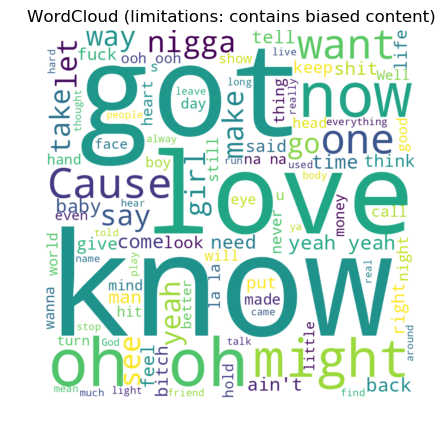

In [ ]:
# Create and generate a word cloud image:
df = pd.read_csv("cleaned_songs.csv")
lyrics_text = ' '.join(df['Lyrics'])

wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=100, contour_width=3, contour_color='steelblue').generate(str(lyrics_text))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud (limitations: contains biased content)")
plt.show()

## Profanity filter and Wordcloud

In [ ]:
bad_word_file = 'Facebook Bad Words List 2022.txt'
with open(bad_word_file) as f:
    bad_words = f.read().split(",")

In [ ]:
len(bad_words)

1110

In [ ]:
def clean_profanity_lyrics(lyrics):
    # Remove all non-alphanumeric characters and convert to lowercase
    clean_text = re.sub(r'[^a-zA-Z\s]', '', lyrics)
    cleaned_lyrics = re.sub(r'[^\w\s]', '', clean_text).lower()
    # Tokenize the lyrics into a list of words
    words = cleaned_lyrics.split()
    # Remove stop words
    words = [word for word in words if word not in bad_words]
    words = [word for word in words if word not in stopwords.words('english')]
    return ' '.join(words)

In [ ]:
def clean_non_profanity(lyrics):
    # Remove all non-alphanumeric characters and convert to lowercase
    clean_text = re.sub(r'[^a-zA-Z\s]', '', lyrics)
    cleaned_lyrics = re.sub(r'[^\w\s]', '', clean_text).lower()
    # Tokenize the lyrics into a list of words
    words = cleaned_lyrics.split()
    # Remove stop words
    words = [word for word in words if word in bad_words]
    words = [word for word in words if word not in stopwords.words('english')]
    return ' '.join(words)


In [ ]:
def tokenize_lyrics(lyrics):
    # Remove all non-alphanumeric characters and convert to lowercase
    clean_text = re.sub(r'[^a-zA-Z\s]', '', lyrics)
    cleaned_lyrics = re.sub(r'[^\w\s]', '', clean_text).lower()
    # Tokenize the lyrics into a list of words
    words = cleaned_lyrics.split()
    return words

In [ ]:
df = pd.read_csv("cleaned_songs.csv")

df['Tokenized Lyrics'] = df['Lyrics'].apply(tokenize_lyrics)
df['Cleaned Lyrics'] = df['Lyrics'].apply(clean_profanity_lyrics)
df['Bad Words'] = df['Lyrics'].apply(clean_non_profanity)
df.to_csv('cleaned_songs.csv', index=False)

In [11]:
def split_to_list_of_words(lyrics):
  return lyrics.split(' ')

In [22]:
def join_to_string(lyrics):
  return " ".join(lyrics)

In [12]:
df = pd.read_csv("cleaned_songs.csv")
df['Cleaned Lyrics List'] = df['Cleaned Lyrics'].apply(split_to_list_of_words)
df.to_csv('cleaned_songs.csv', index=False)

In [14]:
def make_bigrams(lyrics):
    return [bigram_mod[doc] for doc in lyrics]

def make_trigrams(lyrics):
    return [trigram_mod[bigram_mod[doc]] for doc in lyrics]

def lemmatization(lyrics, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):

    texts_out = []
    for sent in lyrics:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [15]:
# Build the bigram and trigram models
data_words =  pd.read_csv('cleaned_songs.csv')['Cleaned Lyrics List'].apply(ast.literal_eval)
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

/usr/local/lib/python3.9/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [17]:

# Form Bigrams
data_words_bigrams = make_bigrams(data_words)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
#! python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
df['Lemmatizated lyrics'] = data_lemmatized

# save progress
df.to_csv('cleaned_songs.csv', index=False)
print(data_lemmatized[:1])

[['life', 'life', 'live', 'special', 'love', 'baby', 'go', 'love', 'baby', 'go', 'special', 'baby', 'go', 'love', 'baby', 'go', 'baby', 'go', 'love', 'understand', 'baby', 'go', 'actin', 'shame', 'be', 'leave', 'can', 'take', 'way', 'mistreat', 'crazy', 'baby', 'come', 'matter', 'phase', 'believe', 'leave', 'believe', 'last', 'real', 'kiss', 'believe', 'bounce', 'baby', 'let', 'talk', 'be', 'bounce', 'be', 'son', 'want', 'baby', 'get', 'leave', 'alone', 'come', 'be', 'good', 'holding', 'spot', 'be', 'good', 'reppin', 'girl', 'block', 'go', 'baby', 'be', 'good', 'get', 'thing', 'lock', 'will', 'fine', 'come', 'baby', 'pride', 'pride', 'baby', 'girl', 'be', 'will', 'need', 'bad', 'easy', 'make', 'decision', 'mad', 'path', 'choose', 'run', 'alone', 'know', 'be', 'independent', 'make', 'home', 'time', 'essence', 'spend', 'alone', 'might_also', 'night', 'wait', 'promise', 'make', 'come', 'much', 'time', 'waste', 'replace', 'make', 'cat', 'nervous', 'thought', 'settle', 'especially', 'creepi

/usr/local/lib/python3.9/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


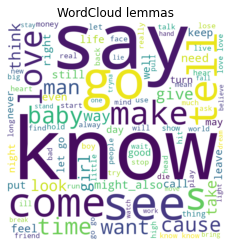

In [23]:
lyrics_text = ' '.join(pd.read_csv('cleaned_songs.csv')['Lemmatizated lyrics'].apply(ast.literal_eval).apply(join_to_string))

wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=100, contour_width=3, contour_color='steelblue').generate(str(lyrics_text))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud lemmas")
plt.show()

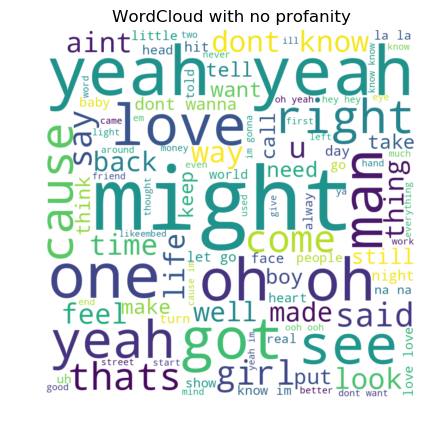

In [ ]:
df = pd.read_csv("cleaned_songs.csv")
lyrics_text = ' '.join(df['Cleaned Lyrics'])

wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=100, contour_width=3, contour_color='steelblue').generate(str(lyrics_text))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud with no profanity")
plt.show()

## Data Statistic per year

In [ ]:
data =  pd.read_csv('cleaned_songs.csv')
# Create a new DataFrame with the year, number of songs, number of unique words, and average number of words per song for each year
year_stats = pd.DataFrame(columns=['Year', 'Num Songs', 'Num Unique Words', 'Avg Words Per Song'])
for year in data['Year'].unique():
    year_data = data[data['Year'] == year]
    num_songs = len(year_data)
    all_words = []
    unique_words = set()
    for lyrics in year_data['Tokenized Lyrics']:
        all_words += lyrics
        unique_words.update(lyrics)
    num_unique_words = len(unique_words)
    avg_words_per_song = len(all_words) / num_songs
    year_stats = year_stats.append({'Year': year, 'Num Songs': num_songs, 'Num Unique Words': num_unique_words, 'Avg Words Per Song': avg_words_per_song}, ignore_index=True)

# Save the year_stats DataFrame to a CSV file
year_stats.to_csv('year_stats.csv', index=False)

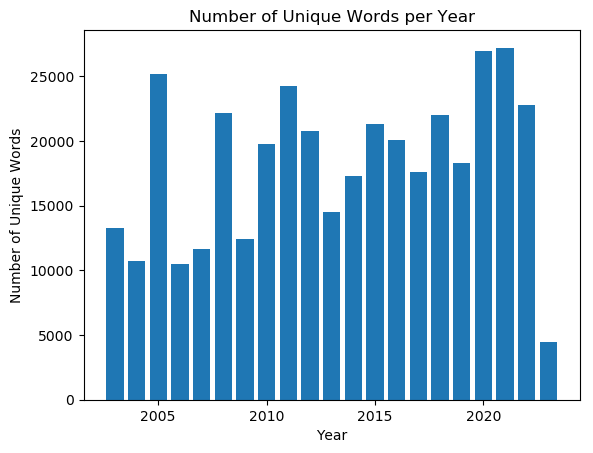

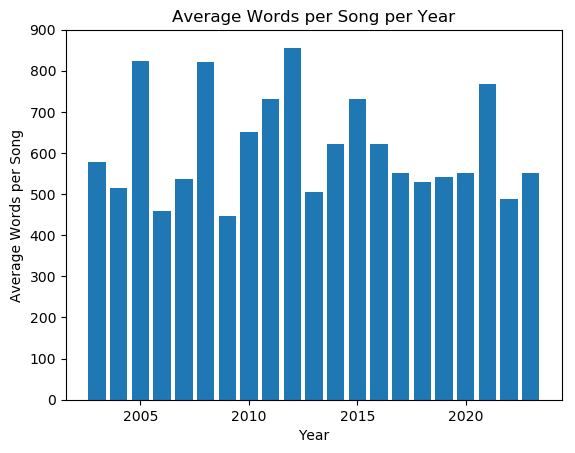

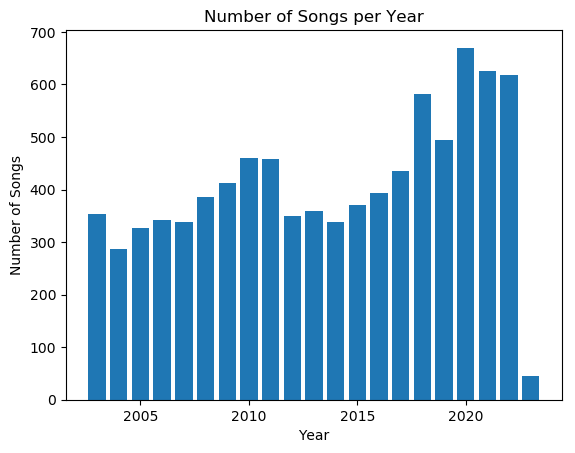

In [ ]:
# Plot the year_stats DataFrame as a bar chart
plt.bar(year_stats['Year'], year_stats['Num Unique Words'])
plt.title('Number of Unique Words per Year')
plt.xlabel('Year')
plt.ylabel('Number of Unique Words')
plt.show()

plt.bar(year_stats['Year'], year_stats['Avg Words Per Song'])
plt.title('Average Words per Song per Year')
plt.xlabel('Year')
plt.ylabel('Average Words per Song')
plt.show()

plt.bar(year_stats['Year'], year_stats['Num Songs'])
plt.title('Number of Songs per Year')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.show()

## LDA

In [25]:
df = pd.read_csv("cleaned_songs.csv")['Lemmatizated lyrics'].apply(ast.literal_eval)

In [26]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 11), (4, 1), (5, 1), (6, 27), (7, 4), (8, 26), (9, 3), (10, 2), (11, 10), (12, 1), (13, 1), (14, 1), (15, 1), (16, 2), (17, 4), (18, 1), (19, 10), (20, 1), (21, 1), (22, 1), (23, 2), (24, 4), (25, 4), (26, 1), (27, 4), (28, 1), (29, 1), (30, 1), (31, 2), (32, 1), (33, 1), (34, 6), (35, 1), (36, 6), (37, 12), (38, 6), (39, 1), (40, 2), (41, 4), (42, 1), (43, 2), (44, 4), (45, 1), (46, 1), (47, 9), (48, 1), (49, 5), (50, 2), (51, 2), (52, 1), (53, 3), (54, 1), (55, 7), (56, 4), (57, 13), (58, 1), (59, 1), (60, 1), (61, 1), (62, 2), (63, 1), (64, 1), (65, 5), (66, 1), (67, 1), (68, 4), (69, 1), (70, 1), (71, 1), (72, 1), (73, 8), (74, 3), (75, 1), (76, 1), (77, 1), (78, 1), (79, 2), (80, 1), (81, 4), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 2), (88, 1), (89, 2), (90, 4), (91, 2), (92, 1), (93, 3), (94, 1), (95, 1), (96, 1), (97, 1), (98, 3), (99, 1), (100, 1), (101, 5), (102, 1), (103, 1), (104, 1), (105, 1), (106, 1), (107, 1), (108, 2), (109, 1), (

In [ ]:
num_topics_list = [5, 10, 15, 20, 25, 30]

# loop over the candidate numbers of topics
for num_topics in num_topics_list:
    # train an LDA model with the current number of topics
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                id2word=id2word,
                                                num_topics=num_topics, 
                                                random_state=100,
                                                update_every=1,
                                                chunksize=100,
                                                passes=10,
                                                alpha='auto',
                                                per_word_topics=True)
    
    # evaluate the coherence of the topics
    coherence_model = CoherenceModel(model=lda_model,
                                     texts=lyrics_list,
                                     dictionary=id2word,
                                     coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    
    # print the number of topics and the coherence score
    print(f"Number of topics: {num_topics}, Coherence score: {coherence_score:.4f}")

In [ ]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [32]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.608262632858548

Coherence Score:  0.38404747682837226


In [33]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
15     0.338008  0.058963       1        1  22.361974
7      0.282382  0.197324       2        1  17.708823
18     0.245038 -0.179275       3        1  10.251344
19     0.057303  0.275198       4        1   8.345890
16     0.238769 -0.171797       5        1   8.249578
3      0.218842  0.031367       6        1   7.592895
5      0.145417 -0.128597       7        1   7.015752
2      0.141552 -0.025393       8        1   5.288637
6     -0.103684  0.031154       9        1   1.745274
11    -0.061983 -0.032130      10        1   1.503630
10    -0.107977  0.066456      11        1   1.390206
9     -0.157975  0.014764      12        1   1.153604
8     -0.156544 -0.021992      13        1   1.104016
12    -0.160955  0.017689      14        1   1.083195
4     -0.118523 -0.050490      15        1   1.029892
1     -0.146973 -0.050608      16        1   0.977697
13    -0.139664 -0.006079      17        1   0.931767
14    -0.163331  0.012611      18        1   0.848711
0     -0.184095 -0.022289      19        1   0.807095
17    -0.165607 -0.016876      20        1   0.610021, topic_info=             Term          Freq         Total Category  logprob  loglift
8              be  75954.000000  75954.000000  Default  30.0000  30.0000
34            get  38491.000000  38491.000000  Default  29.0000  29.0000
55           love  19314.000000  19314.000000  Default  28.0000  28.0000
108          want  15116.000000  15116.000000  Default  27.0000  27.0000
83            say  20460.000000  20460.000000  Default  26.0000  26.0000
...           ...           ...           ...      ...      ...      ...
54731    militare     60.499133     63.840518  Topic20  -5.2066   5.0457
54784       vario     60.499133     63.840518  Topic20  -5.2066   5.0457
54746      patrio     47.754231     51.957383  Topic20  -5.4431   5.0151
60     might_also    108.481034   5757.396428  Topic20  -4.6226   1.1278
87            son     45.314913    743.034952  Topic20  -5.4956   2.3023

[1071 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
6935      4  0.997950   abandon
1248      4  0.998477      able
1322      6  0.984327     abuse
6938     11  0.989892    accent
6758      9  0.989095  acoustic
...     ...       ...       ...
191       7  0.945101     young
8180     15  0.989341   youngin
3509     14  0.987418     youth
8943     12  0.992644         z
4778     19  0.970677       zoo

[1852 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[16, 8, 19, 20, 17, 4, 6, 3, 7, 12, 11, 10, 9, 13, 5, 2, 14, 15, 1, 18])

## Understanding lyrics with T5 transformer

### Prepare model



In [ ]:
torch.cuda.empty_cache()

In [ ]:
MODEL_NAME = 'igorktech/t5-base-en'
SAVE_MODEL_NAME = 't5-base-en-explainer'
model = T5ForConditionalGeneration.from_pretrained(MODEL_NAME)
tokenizer = T5Tokenizer.from_pretrained(MODEL_NAME)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device);

TRAIN_BATCH_SIZE = 16
EVAL_BATCH_SIZE = 4
REPORT_STEPS = 250
EPOCHS = 5
LEARNING_RATE = 1e-4
TASK_PREFIX = "explain | "
MAX_INPUT = 64
MAX_OUTPUT = 64
SPLIT_SIZE = 0.05
# model.config.max_length = MAX_OUTPUT #not mandatory
SAVE_TO_HUB = True

In [ ]:
if SAVE_TO_HUB: 
    notebook_login()

Token is valid.
Your token has been saved in your configured git credential helpers (store).
Your token has been saved to /root/.cache/huggingface/token
Login successful


### Prepare pairs of text for training

In [ ]:
pairs = []
df =  pd.read_csv('cleaned_songs.csv')['Song annotations'].apply(ast.literal_eval)

for index in range(len(df)):
    for tup in df[index]:

        new_tup = (tup[0], re.sub(r'http\S+', '', tup[1][0][0]))
        pairs.append(new_tup)

# # create a new DataFrame with the new list of tuples
new_df = pd.DataFrame(pairs, columns=['Lyrics', 'Description'])

In [ ]:
new_df.to_csv('lyrics_annotation_pairs.csv',index = False)

In [ ]:
data = pd.read_csv('/content/lyrics_annotation_pairs.csv')

In [ ]:
data.dropna(subset=['Lyrics'])
data['Lyrics'] = data['Lyrics'].astype(str)
# Drop text in [brakets]
data = data[~data['Lyrics'].str.contains('^\[.*\]$')]
data.to_csv('lyrics_annotation_pairs.csv',index = False)

In [ ]:
data = pd.read_csv('/content/lyrics_annotation_pairs.csv')
#drop tokens that are more than max output
data = data[data['Description'].str.count(' ') < MAX_OUTPUT]

In [ ]:
pairs = []
for a, b in zip(data['Lyrics'].astype(str), data['Description'].astype(str)):
    pairs.append((TASK_PREFIX + a, b))

In [ ]:
print(len(pairs))

25376


### Training loop

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

In [ ]:
# Split data into train and validation sets
train_pairs, val_pairs = train_test_split(pairs, test_size=SPLIT_SIZE)
# Define training and validation functions
def train(model, optimizer, tokenizer, train_pairs):
    model.train()
    losses = []
    for i in trange(0, int(len(train_pairs) / TRAIN_BATCH_SIZE)):
        batch = train_pairs[i * TRAIN_BATCH_SIZE: (i + 1) * TRAIN_BATCH_SIZE]
        
        x = tokenizer([p[0] for p in batch], return_tensors='pt', padding="longest", \
                      max_length=MAX_INPUT, truncation=True).to(model.device)
        y = tokenizer([p[1] for p in batch], return_tensors='pt', padding="longest", \
                      max_length=MAX_OUTPUT, truncation=True, ).to(model.device)
        y.input_ids[y.input_ids == 0] = -100
        loss = model(
            input_ids=x.input_ids,
            attention_mask=x.attention_mask,
            labels=y.input_ids,
            decoder_attention_mask=y.attention_mask,
            return_dict=True
        ).loss
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        losses.append(loss.item())
        if i % REPORT_STEPS == 0:
            print('train step', i, 'loss', np.mean(losses[-REPORT_STEPS:]))
            
    # Return training losses for plotting
    return losses

def evaluate(model, tokenizer, val_pairs):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for i in trange(0, int(len(val_pairs) / EVAL_BATCH_SIZE)):
            batch = val_pairs[i * EVAL_BATCH_SIZE: (i + 1) * EVAL_BATCH_SIZE]
            x = tokenizer([p[0] for p in batch], return_tensors='pt', padding="longest", \
                          max_length=MAX_INPUT, truncation=True).to(model.device)
            y = tokenizer([p[1] for p in batch], return_tensors='pt', padding="longest", \
                          max_length=MAX_OUTPUT, truncation=True, ).to(model.device)
            y.input_ids[y.input_ids == 0] = -100
            loss = model(
                input_ids=x.input_ids,
                attention_mask=x.attention_mask,
                labels=y.input_ids,
                decoder_attention_mask=y.attention_mask,
                return_dict=True
            ).loss
            total_loss += loss.item()
        avg_loss = total_loss / int(len(val_pairs) / EVAL_BATCH_SIZE)
        print('validation loss', avg_loss)
        return avg_loss

# Train the model for multiple epochs and store losses
train_losses = []
val_losses = []
best_val_loss = float('inf')
for epoch in range(EPOCHS):
    print('EPOCH', epoch)
    random.shuffle(train_pairs)
    train_loss = train(model, optimizer, tokenizer, train_pairs)
    val_loss = evaluate(model, tokenizer, val_pairs)
    train_losses += train_loss
    val_losses.append(val_loss)
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), 'model.pt')
        


EPOCH 0


  0%|          | 0/1506 [00:00<?, ?it/s]

train step 0 loss 11.566267967224121
train step 250 loss 7.393606592178345
train step 500 loss 5.871733896255493
train step 750 loss 5.37544298362732
train step 1000 loss 5.100861392974854
train step 1250 loss 4.913109476089478
train step 1500 loss 4.775294013977051


  0%|          | 0/317 [00:00<?, ?it/s]

validation loss 4.094170960718149
EPOCH 1


  0%|          | 0/1506 [00:00<?, ?it/s]

train step 0 loss 4.658426761627197
train step 250 loss 4.665075389862061
train step 500 loss 4.572071800231933
train step 750 loss 4.518023572921753
train step 1000 loss 4.425182367324829
train step 1250 loss 4.38206570148468
train step 1500 loss 4.328442592620849


  0%|          | 0/317 [00:00<?, ?it/s]

validation loss 3.7888574502445547
EPOCH 2


  0%|          | 0/1506 [00:00<?, ?it/s]

train step 0 loss 4.244400501251221
train step 250 loss 4.262203379631043
train step 500 loss 4.211650747299195
train step 750 loss 4.179477921485901
train step 1000 loss 4.147976439476013
train step 1250 loss 4.089478424072266
train step 1500 loss 4.073042673110962


  0%|          | 0/317 [00:00<?, ?it/s]

validation loss 3.5735098127310962
EPOCH 3


  0%|          | 0/1506 [00:00<?, ?it/s]

train step 0 loss 3.9695119857788086
train step 250 loss 4.00317596244812
train step 500 loss 3.971366273880005
train step 750 loss 3.9311935205459596
train step 1000 loss 3.9185365800857546
train step 1250 loss 3.8969780158996583
train step 1500 loss 3.8675303134918213


  0%|          | 0/317 [00:00<?, ?it/s]

validation loss 3.4405473241294597
EPOCH 4


  0%|          | 0/1506 [00:00<?, ?it/s]

train step 0 loss 3.690129280090332
train step 250 loss 3.8280846490859983
train step 500 loss 3.7900263051986696
train step 750 loss 3.767849338531494
train step 1000 loss 3.748133785247803
train step 1250 loss 3.7329543857574463
train step 1500 loss 3.7184234704971315


  0%|          | 0/317 [00:00<?, ?it/s]

validation loss 3.3457054226932463


ValueError: ignored

In [ ]:
# Save progress
df = pd.DataFrame({
    'train_loss': train_losses
})
df.to_csv('t5_train_loss.csv')
df = pd.DataFrame({
    'val_loss': val_losses
})
df.to_csv('t5_val_loss.csv')

### Save model

In [ ]:
if SAVE_TO_HUB:
    model.push_to_hub(SAVE_MODEL_NAME)
    tokenizer.push_to_hub(SAVE_MODEL_NAME)
else:
    model.save_pretrained(SAVE_MODEL_NAME)
    tokenizer.save_pretrained(SAVE_MODEL_NAME)

Upload 1 LFS files:   0%|          | 0/1 [00:00<?, ?it/s]

pytorch_model.bin:   0%|          | 0.00/916M [00:00<?, ?B/s]

Upload 1 LFS files:   0%|          | 0/1 [00:00<?, ?it/s]

spiece.model:   0%|          | 0.00/597k [00:00<?, ?B/s]

### Plot Losses

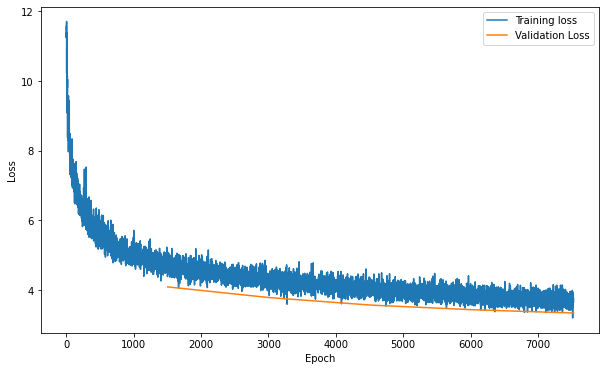

In [ ]:
# Plot 
plt.figure(figsize=(10, 6))
df = pd.read_csv('t5_train_loss.csv')
plt.plot(df.iloc[:, 0],df['train_loss'], label='Training loss')
df = pd.read_csv('t5_val_loss.csv')
plt.plot((df.iloc[:, 0]+1)*int(len(pairs)*(1-SPLIT_SIZE)/TRAIN_BATCH_SIZE), df['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Testing model

In [ ]:
model.eval()

def explain(x, **kwargs):
    inputs = tokenizer(x, return_tensors='pt').to(model.device)
    with torch.no_grad():
        hypotheses = model.generate(**inputs, **kwargs)
    return tokenizer.decode(hypotheses[0], skip_special_tokens=True)

In [ ]:
print('prediction: ', explain(TASK_PREFIX + 'What is love?'))

/usr/local/lib/python3.9/dist-packages/transformers/generation/utils.py:1288: UserWarning: Using `max_length`'s default (20) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


prediction:  This is a reference to the song “Love” by Drake.


### BLEU score

In [ ]:
reference = ['the', 'cat', 'is', 'on', 'the', 'mat']
candidate = ['the', 'cat', 'is', 'sitting', 'on', 'the', 'mat']

# Set weights for 3-gram
weights = (0.33, 0.33, 0.33)

# Compute BLEU score with 3-gram
score = sentence_bleu([reference], candidate, weights=weights)

print(score)